 # 記述統計

In [1]:
# %
from matplotlib import rcParams
import doctest
import unittest
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
import numpy as np
path = os.path.dirname(os.path.abspath(__file__))

 ## データの分離

 ### 数量データ・カテゴリーデータ

 ### 離散型のデータ・連続型のデータ

 ### 2個データ・多値データ

 ### 名義尺度・順序尺度・間隔尺度・比例尺度

 ### 1変量データ・多変量データ

 ### 時系列データ・クロスセクションデータ

 ## 数式の読み方

 ### 表現の技法としての数式

 ### 標本を数式で表記する
 $$
 {x_i}^{n}_{i=1} = { x_1, x_2, \ldots, x_n }
 $$

 ### なぜ数式で表記するのか

 ### 足し算とΣ記号

 ### 標本平均を数式で表記する
 $$
 \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
 $$

 ### 掛け算とΠ記号

 ## 度数分布

 ### さまざまな集計の方法を学ぶのか

 ### 度数・度数分布

 ### 階級・階級値

 ### 分析の準備

 ### 度数分布

 #### カテゴリーデータの度数分布

In [2]:
category_data = pd.read_csv(path + '/data/3-3-1-fish-species.csv')
print(category_data)
category_data.species.value_counts()

  species
0       A
1       A
2       A
3       B
4       B
5       B
6       B
7       B
8       B
9       B


species
B    7
A    3
Name: count, dtype: int64

 #### 数量データの度数分布

In [3]:
numeric_data = pd.read_csv(path + '/data/3-3-2-fish-length.csv')
print(numeric_data)

numeric_data.length.value_counts(bins=3)

np.arange(0, 6, 1)
freq = numeric_data.length.value_counts(
    bins=np.arange(0, 6, 1), sort=False)
freq

   length
0    1.91
1    1.21
2    2.28
3    1.01
4    1.00
5    4.50
6    1.96
7    0.72
8    3.67
9    2.55


length
(-0.001, 1.0]    2
(1.0, 2.0]       4
(2.0, 3.0]       2
(3.0, 4.0]       1
(4.0, 5.0]       1
Name: count, dtype: int64

 #### numpyの関数を使う

In [4]:
np.histogram(numeric_data.length, bins=3)
np.histogram(numeric_data.length, bins=np.arange(0, 6, 1))

(array([1, 5, 2, 1, 1]), array([0, 1, 2, 3, 4, 5]))

 ### 相対度数分布・累積度数分布

 ### 相対度数分布・累積度数分布

In [5]:
rel_freq = freq / sum(freq)
rel_freq

numeric_data.length.value_counts(
    bins=np.arange(0, 6, 1), sort=False, normalize=True)

np.histogram(numeric_data.length, bins=np.arange(0, 6, 1), density=True)

(array([0.1, 0.5, 0.2, 0.1, 0.1]), array([0, 1, 2, 3, 4, 5]))

 #### 累積度数分布

In [6]:
freq.cumsum()

freq_np = np.histogram(numeric_data.length, bins=np.arange(0, 6, 1))[0]
np.cumsum(freq_np)

array([ 1,  6,  8,  9, 10])

 #### 累積早退度数分布

In [7]:
rel_freq.cumsum()

length
(-0.001, 1.0]    0.2
(1.0, 2.0]       0.6
(2.0, 3.0]       0.8
(3.0, 4.0]       0.9
(4.0, 5.0]       1.0
Name: count, dtype: float64

 ### ヒストグラム

 #### グラフ描画とmatplotlib-seaborn

In [8]:
# グラフを描画するライブラリ
sns.set()

 #### ヒストグラム

<Axes: xlabel='length', ylabel='Count'>

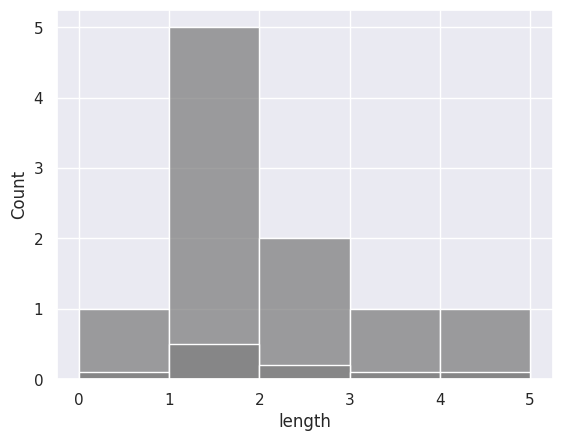

In [9]:
sns.histplot(x='length', data=numeric_data,
             color='gray', bins=np.arange(0, 6, 1))

sns.histplot(x='length', data=numeric_data,
             color='gray', bins=np.arange(0, 6, 1), stat='density')

 ### 階級の幅が異なるヒストグラム

<Axes: xlabel='length', ylabel='Density'>

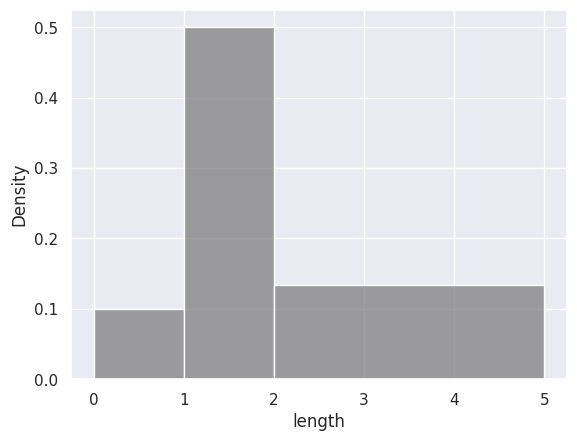

In [10]:
np.histogram(numeric_data.length, bins=[0, 1, 2, 5], density=True)
sns.histplot(x='length', data=numeric_data,
             color='gray', bins=[0, 1, 2, 5], stat='density')

 ### カーネル密度推定

 ### カーネル密度推定

 #### 基本的な実装

<Axes: xlabel='length', ylabel='Density'>

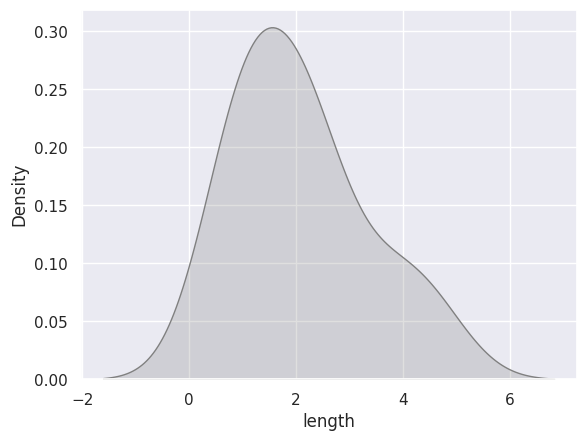

In [11]:
sns.kdeplot(data=numeric_data.length, fill=True, color='gray')

 #### バンド幅の変更

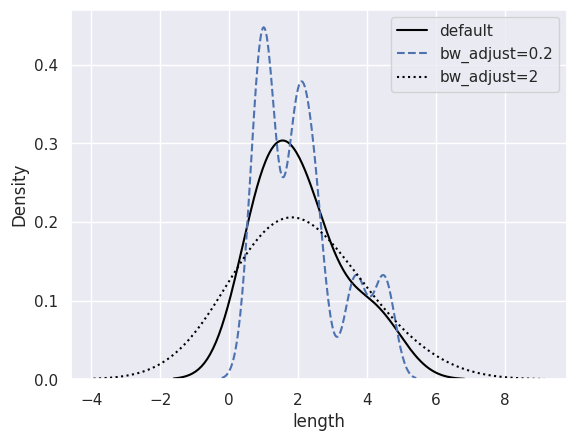

In [12]:
sns.kdeplot(data=numeric_data.length, color='black', label='default')
sns.kdeplot(data=numeric_data.length, bw_adjust=0.4,
            linestyle='dashed', label='bw_adjust=0.2')
sns.kdeplot(data=numeric_data.length, color='black',
            bw_adjust=2, linestyle='dotted', label='bw_adjust=2')
plt.legend()  # 凡例

 ## １変量データの統計量

 ### 分析の準備

 ### 分析の対象となるデータの用意

 #### numpyアレイで用意

In [13]:
fish_length = np.array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])
fish_length

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

 #### CSVファイルから読み込む

In [14]:
fish_length_df = pd.read_csv(path + '/data/3-4-1-fish-length.csv')
print(fish_length_df)

   length
0       2
1       3
2       3
3       4
4       4
5       4
6       4
7       5
8       5
9       6


 #### データフレームとアレイの返還

In [15]:
fish_length_df.length.to_numpy() == fish_length

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

 ### サンプライズ

In [16]:
len(fish_length)
len(fish_length_df)

10

 ### 合計値

 #### 基本的な計算方法

In [17]:
np.sum(fish_length)

np.sum(fish_length_df)

length    40
dtype: int64

 #### その他の計算方法

In [18]:
fish_length.sum()

fish_length_df.sum()

length    40
dtype: int64

 ### 標本平均
 $$
 \bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_i
 $$

 #### 計算方法の確認

In [19]:
n = len(fish_length)
n

sum_vlaue = np.sum(fish_length)
sum_vlaue

x_bar = sum_vlaue / n
x_bar

4.0

 #### 関数を使った効率的な実装

In [20]:
np.mean(fish_length)

4.0

 ### 標本分散

 #### 分散の定義
 $$
 \sigma^2 = \frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^2
 $$

 ### 標本分散

 #### 計算方法の確認

In [21]:
s2 = np.sum((fish_length - x_bar)**2) / n
s2

1.2

 #### 実装コードの解読

In [22]:
fish_length
fish_length - x_bar
(fish_length - x_bar)**2
np.sum((fish_length - x_bar)**2)

12.0

 #### 関数を使った効率的な実装

In [23]:
np.var(fish_length, ddof=0)

1.2

 ### 不偏分散
 $$
 \sigma^2 = \frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})^2
 $$

 ### 不偏分散

 #### 計算方法の確認

In [24]:
u2 = np.sum((fish_length - x_bar)**2) / (n - 1)
u2
round(u2, 3)

1.333

 #### 関数を使った効率的な実装

In [25]:
round(np.var(fish_length, ddof=1), 3)

1.333

 #### ライブラリの違いに注意

In [26]:
np.var(fish_length_df)
fish_length_df.var()
fish_length_df.var(ddof=0)

length    1.2
dtype: float64

 ### 標準偏差
 $$
 \sigma = \sqrt{\sigma^2}
 = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^2}
 $$

 ### 標準偏差

 #### 計算方法の確認

In [27]:
s = np.sqrt(s2)
round(s, 3)

1.095

 #### 関数を使った効率的な実装

In [28]:
round(np.std(fish_length, ddof=0), 3)

1.095

 ### 変動係数
 $$
 CV = \frac{\sigma}{\bar{x}}
 $$

 ### 変動係数

 #### 計算方法の確認

In [29]:
cv = s / x_bar
round(cv, 3)

0.274

 #### 関数を使った効率的な実装

In [30]:
round(stats.variation(fish_length), 3)
round(stats.variation(fish_length, ddof=1), 3)

0.289

 #### 変動係数を使う注意点

In [31]:
winter = np.array([1, 1, 1, 2, 2, 2])
summar = np.array([29, 29, 29, 30, 30, 30])
print('冬の気温の標準偏差：', np.std(winter, ddof=0))
print('夏の気温の標準偏差：', np.std(summar, ddof=0))

print('冬の気温の変動係数：', stats.variation(winter))
print('夏の気温の変動係数：', stats.variation(summar))

冬の気温の標準偏差： 0.5
夏の気温の標準偏差： 0.5
冬の気温の変動係数： 0.3333333333333333
夏の気温の変動係数： 0.01694915254237288


 ### 標準化
 $$
 z_i = \frac{x_i - \bar{x}}{s}
 $$

 ### 標準化

 #### 計算方法の確認

In [32]:
z = (fish_length - x_bar) / s
np.round(z, 3)
np.mean(z)
np.std(z, ddof=0)

1.0

 #### 関数を使った効率的な実装

In [33]:
np.round(stats.zscore(fish_length, ddof=0), 3)

array([-1.826, -0.913, -0.913,  0.   ,  0.   ,  0.   ,  0.   ,  0.913,
        0.913,  1.826])

 ### 最小値・最大値・中央値・四分位点

 ### 最小値・最大値・中央値・四分位点

 ### 最小値・最大値

In [34]:
np.amin(fish_length)
np.amax(fish_length)

6

 ### 中央値

 #### 中央値の実装

In [35]:
np.median(fish_length)

4.0

 #### 平均値と中央値の違い

In [36]:
fish_length_2 = np.array([2, 3, 3, 4, 4, 4, 4, 5, 5, 100])
print('平均値：', np.mean(fish_length_2))
print('中央値：', np.median(fish_length_2))

平均値： 13.4
中央値： 4.0


 ### 四分位点

In [37]:
print('第1四分位点:', np.quantile(fish_length, q=0.25))
print('第2四分位点:', np.quantile(fish_length, q=0.75))
fish_length_3 = np.arange(0, 101, 1)
fish_length_3

print('第1四分位点:', np.quantile(fish_length_3, q=0.25))
print('第2四分位点:', np.quantile(fish_length_3, q=0.75))
print('中央値:', np.median(fish_length_3))
print('50%点:', np.quantile(fish_length_3, q=0.5))

第1四分位点: 3.25
第2四分位点: 4.75
第1四分位点: 25.0
第2四分位点: 75.0
中央値: 50.0
50%点: 50.0


 ### 最頻値

In [38]:
fish_length
stats.mode(fish_length)
stats.mode(np.array([1, 1, 1, 1, 2, 3, 3, 3]))

<ipython-input-38-487ce523b65a>:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(fish_length)
<ipython-input-38-487ce523b65a>:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(np.array([1, 1, 1, 1, 2, 3, 3, 3]))


ModeResult(mode=array([1]), count=array([4]))

 ### pandasのdescribe関数の利用

In [39]:
print(fish_length_df.describe())

          length
count  10.000000
mean    4.000000
std     1.154701
min     2.000000
25%     3.250000
50%     4.000000
75%     4.750000
max     6.000000


 ## 多変量データの統計量

 ### 分析の準備

 ### 分析の対象となるデータの用意

In [40]:
cov_data = pd.read_csv(path + '/data/3-5-1-cov.csv')
print(cov_data)

      x   y
0  18.5  34
1  18.7  39
2  19.1  41
3  19.7  38
4  21.5  45
5  21.7  41
6  21.8  52
7  22.0  44
8  23.4  44
9  23.8  49


 ### 共分散

 #### 共分散の数式を用いた表現
 $$
 Cov_(x,y) = \frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})
 $$

 ### 分散共分散行列
 $$
 \begin{pmatrix}
     \sigma_{x}^2 & Cov_(x,y) \\
     Cov_(x,y) & \sigma_{y}^2
 \end{pmatrix}
 $$

 ### 共分散

In [41]:
# データ取り出し
x = cov_data['x']
y = cov_data['y']

# サンプルサイズ
n = len(cov_data)

# 標本平均
x_bar = np.mean(x)
y_bar = np.mean(y)

cov = sum((x - x_bar) * (y - y_bar)) / n
round(cov, 3)

6.906

 ### 分散共分散行列

In [42]:
s2_x = np.var(x, ddof=0)
s2_y = np.var(y, ddof=0)

print('分散s2_x:', round(s2_x, 3))
print('分散s2_y:', round(s2_y, 3))

np.cov(x, y, ddof=0)

分散s2_x: 3.282
分散s2_y: 25.21


array([[ 3.2816,  6.906 ],
       [ 6.906 , 25.21  ]])

 ### ピアソンの積率相関係数
 $$
 r = \frac{Cov_(x,y)}{\sqrt{\sigma_{x}^2}\sqrt{\sigma_{y}^2}}
 $$

 ### 相関行列
 ２変数の場合
 $$
 \begin{pmatrix}
     1 & r \\
     r & 1
 \end{pmatrix}
 $$
 ３変数の場合
 $$
 \begin{pmatrix}
     1 & r_{xy} & r_{xz} \\
     r_{xy} & 1 & r_{yz} \\
     r_{xz} & r_{yz} & 1
 \end{pmatrix}
 $$

 ### ピアソンの積率相関係数

In [43]:
rho = cov / np.sqrt(s2_x * s2_y)
round(rho, 3)

0.759

 ### 関数を使った効率的な実装

In [44]:
np.corrcoef(x, y)

array([[1.       , 0.7592719],
       [0.7592719, 1.       ]])

 ### 相関行列が役に立たないとき

 ### クロス集計表

 ### クロス集計表

In [45]:
disease = pd.read_csv(path + '/data/3-5-2-cross.csv')
print(disease.head())

cross_1 = pd.crosstab(
    disease['sunlight'],
    disease['disease']
)
print(cross_1)

  sunlight disease
0      yes     yes
1      yes     yes
2      yes     yes
3      yes      no
4      yes      no
disease   no  yes
sunlight         
no         2    8
yes        7    3


 ### 数量が記録されている事例

In [46]:
shoes = pd.read_csv(path + '/data/3-5-3-cross2.csv')
print(shoes)

cross_2 = pd.pivot_table(
    data=shoes,
    values='sales',
    aggfunc='sum',
    index='store',
    columns='color'
)
print(cross_2)

   store color  sales
0  tokyo  blue     10
1  tokyo   red     15
2  osaka  blue     13
3  osaka   red      9
color  blue  red
store           
osaka    13    9
tokyo    10   15


 ## 層別分析

 ### 層別分析

 ### 整然データ

 ### 雑然データ

 ### 雑然データの例

 ### 分析の準備

In [47]:
sns.set()

 ### 分析対象となるデータの用意

In [48]:
fish_multi = pd.read_csv(path + '/data/3-6-1-fish_multi.csv')
print(fish_multi.head())

len(fish_multi)

fish_multi['species'].value_counts()

np.mean(fish_multi['length'])

  species  length
0       A       2
1       A       3
2       A       3
3       A       4
4       A       4


5.5

 ### グループ別の統計量の計算

 #### グループ別の平均値

In [49]:
group = fish_multi.groupby('species')
print(group.mean())

         length
species        
A           4.0
B           7.0


 #### グループ別の要約統計量

In [50]:
print(group.describe())

        length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0


 #### pandas以外の関数を使う

In [51]:
print(group.agg(stats.mode))

             length
species            
A        ([4], [4])
B        ([7], [4])


/home/ubuntu/projects/k2wroks/programing_introduce_2023/.venv/lib/python3.8/site-packages/pandas/core/groupby/generic.py:285: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  f = lambda x: func(x, *args, **kwargs)


 ### ペンギンデータの読み込み

 #### データの読み込み

In [52]:
penguins = sns.load_dataset('penguins')
print(penguins.head(n=2))

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  


 #### データのチェック

In [53]:
penguins['species'].value_counts()

penguins.query('island == "Torgersen"')['species'].value_counts()

species
Adelie    52
Name: count, dtype: int64

 ### ペンギンデータの層別分析

In [54]:
group_penguins = penguins.groupby(['species', 'sex'])
print(group_penguins.mean(numeric_only=True)['body_mass_g'])

group_penguins = penguins.groupby(['species', 'island', 'sex'])
print(group_penguins.mean(numeric_only=True)['body_mass_g'])

species    sex   
Adelie     Female    3368.835616
           Male      4043.493151
Chinstrap  Female    3527.205882
           Male      3938.970588
Gentoo     Female    4679.741379
           Male      5484.836066
Name: body_mass_g, dtype: float64
species    island     sex   
Adelie     Biscoe     Female    3369.318182
                      Male      4050.000000
           Dream      Female    3344.444444
                      Male      4045.535714
           Torgersen  Female    3395.833333
                      Male      4034.782609
Chinstrap  Dream      Female    3527.205882
                      Male      3938.970588
Gentoo     Biscoe     Female    4679.741379
                      Male      5484.836066
Name: body_mass_g, dtype: float64


 ### 欠損値の扱いに注意

 #### 欠測値

In [55]:
print(penguins[['species', 'body_mass_g']].head(n=4))

  species  body_mass_g
0  Adelie       3750.0
1  Adelie       3800.0
2  Adelie       3250.0
3  Adelie          NaN


 #### 欠損値に対する挙動

In [56]:
group_sp = penguins.groupby(['species'])
print(group_sp.count()['body_mass_g'])

round(group_sp.sum()['body_mass_g'].Adelie / 151, 3)

round(group_sp.mean(numeric_only=True)['body_mass_g'].Adelie, 3)

species
Adelie       151
Chinstrap     68
Gentoo       123
Name: body_mass_g, dtype: int64


3700.662

 ### 単純なヒストグラム

<Axes: xlabel='length', ylabel='Count'>

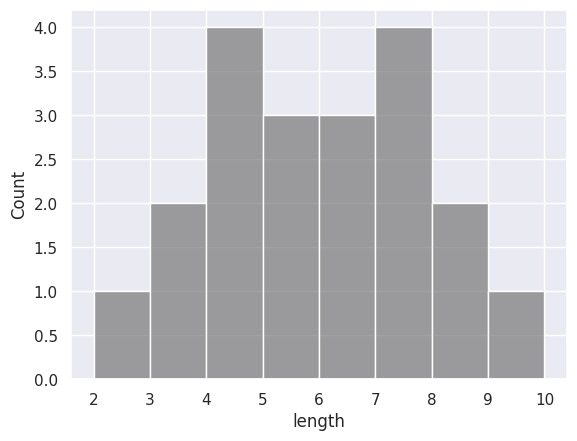

In [57]:
bins = np.arange(2, 11, 1)
bins

sns.histplot(x='length',  # x軸
             data=fish_multi,  # データ
             bins=bins,  # bins
             color='gray')  # 色の指定（グレースケール）

 ### グループ別のヒストグラム

<Axes: xlabel='length', ylabel='Count'>

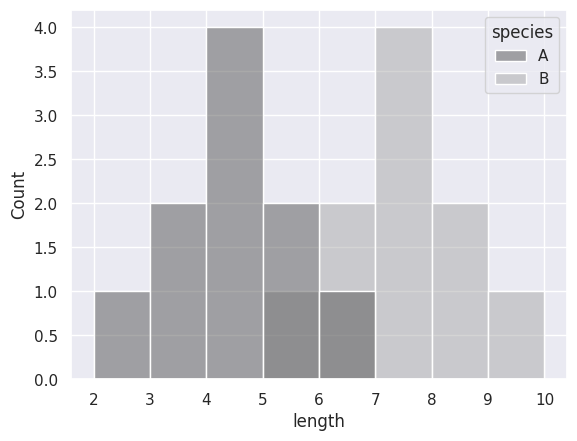

In [58]:
sns.histplot(x='length',  # x軸
             hue='species',  # 色分けの対象
             data=fish_multi,  # データ
             bins=bins,  # bins
             palette='gray')  # 色の指定（グレースケール）

 ## グラフの活用

 ### 分析の準備

In [59]:
sns.set()

 ### matplotlib・seaborn

 #### seabornによるグラフの書き方
 sns.関数名(
    x='x軸の変数名',
    y='y軸の変数名',
    data='データフレーム名',
    その他引数
 )

 ### 分析対象となるデータの読み込み

In [60]:
cov_ata = pd.read_csv(path + '/data/3-5-1-cov.csv')
print(cov_data.head(3))

lineplot_df = pd.read_csv(path + '/data/3-7-1-lineplot-data.csv')
print(lineplot_df.head(3))

      x   y
0  18.5  34
1  18.7  39
2  19.1  41
   x  y
0  0  2
1  1  3
2  2  4


 #### 数量データとカテゴリーデータが混ざったデータ

In [61]:
fish_mult = pd.read_csv(path + '/data/3-6-1-fish_multi.csv')
print(fish_multi.head(3))

penguins = sns.load_dataset('penguins')
print(penguins.head(3))

  species  length
0       A       2
1       A       3
2       A       3
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  


 ### 散布図

<Axes: xlabel='x', ylabel='y'>

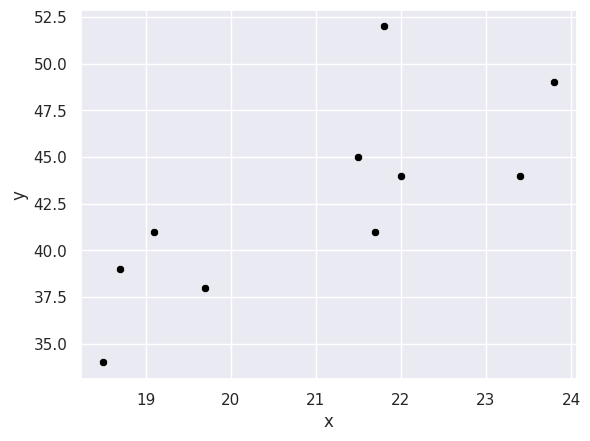

In [62]:
sns.scatterplot(x='x', y='y', data=cov_data, color='black')

 ### グラフの装飾と保存

 #### 日本語を利用する準備

In [63]:
# グラフの日本語表記
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'Meiryo'

 #### グラフの装飾と保存

findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
<ipython-input-64-a7c4bb969d5c>:8: UserWarning

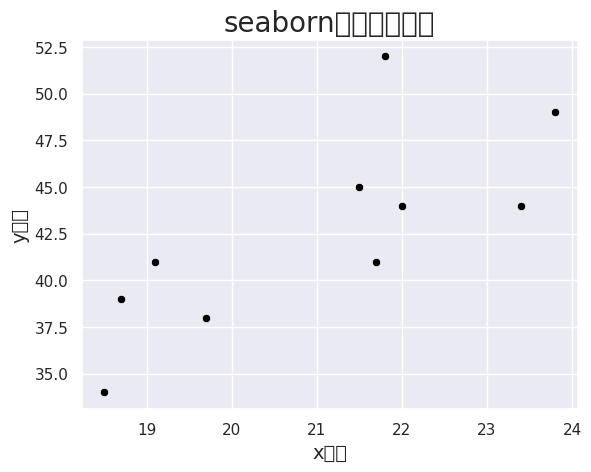

In [64]:
# 散布図
sns.scatterplot(x='x', y='y', data=cov_data, color='black')
# 装飾
plt.title('seabornによる散布図', fontsize=20)  # タイトル
plt.xlabel('xの値', fontsize=14)  # x軸ラベル
plt.ylabel('yの値', fontsize=14)  # y軸ラベル
# グラフの保存
plt.savefig(path + '/img/3-7-1-scatterplot.png')

 ### 折れ線グラフ

<Axes: xlabel='x', ylabel='y'>

findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not foun

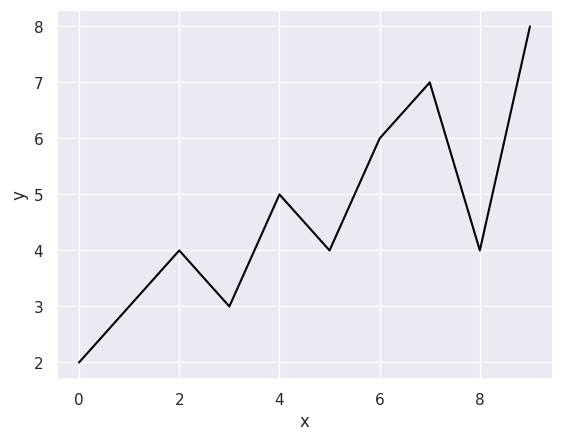

In [65]:
sns.lineplot(x='x', y='y', data=lineplot_df, color='black')

 ### 棒グラフ

<Axes: xlabel='species', ylabel='length'>

findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not foun

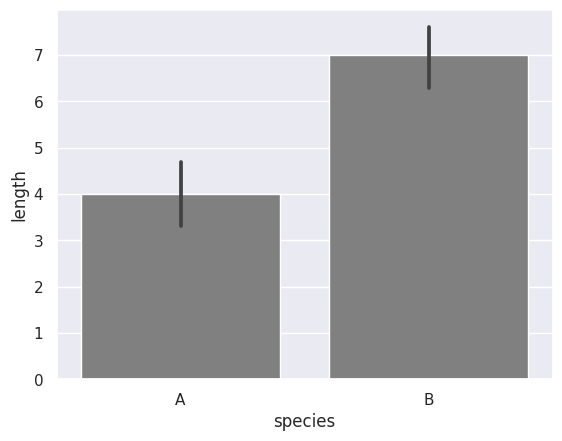

In [66]:
sns.barplot(x='species', y='length', data=fish_multi, color='gray')

 ### 箱ひげ図

findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not foun

        length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0


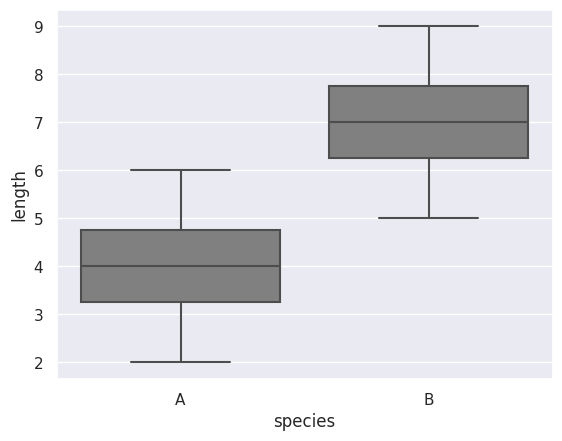

In [67]:
sns.boxplot(x='species', y='length', data=fish_multi, color='gray')
print(fish_multi.groupby('species').describe())

 ### バイオリンプロット

<Axes: xlabel='species', ylabel='length'>

findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not foun

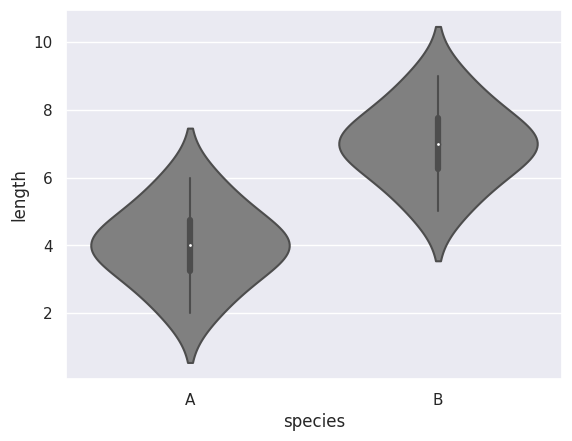

In [68]:
sns.violinplot(x='species', y='length', data=fish_multi, color='gray')

 ### axis-leve関数とfigure-leve関数

findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not foun

findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not foun

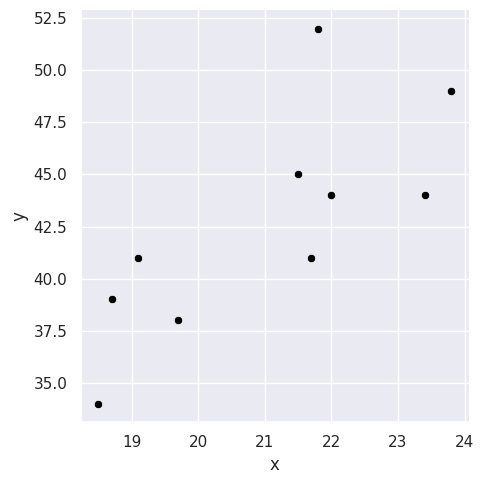

In [69]:
sns.relplot(kind='scatter', x='x', y='y', data=cov_data, color='black')

 ### 種類・性別のバイオリンプロット

<Axes: xlabel='species', ylabel='body_mass_g'>

findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not foun

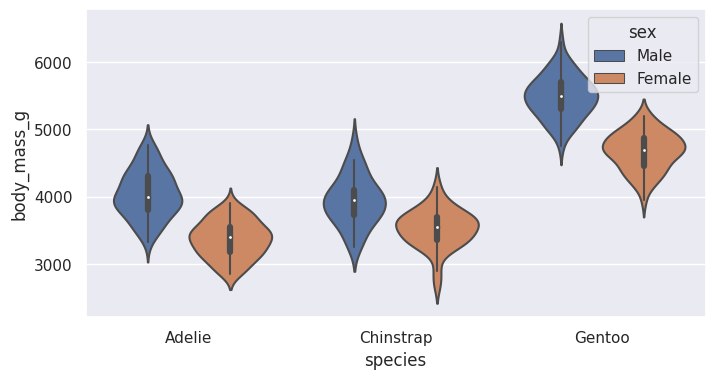

In [70]:
# 描画オブジェクトを生成
fig, ax = plt.subplots(figsize=(8, 4))
# バイオリンプロットの描画
sns.violinplot(x='species', y='body_mass_g', hue='sex',
               data=penguins, pallette='gray', ax=ax)

 ### 種別・性別のバイオリンプロット

findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not foun

findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not foun

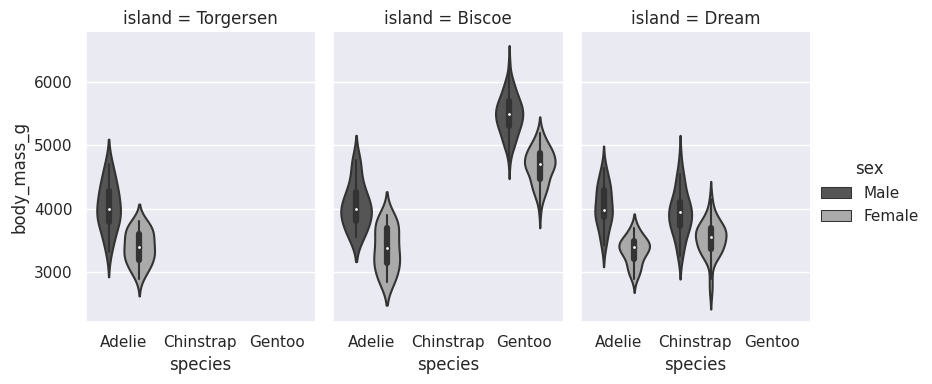

In [71]:
sns.catplot(kind='violin', x='species', y='body_mass_g', hue='sex',
            col='island', data=penguins, palette='gray', height=4, aspect=0.7)

 ### ペアプロット

findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not foun

findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not foun

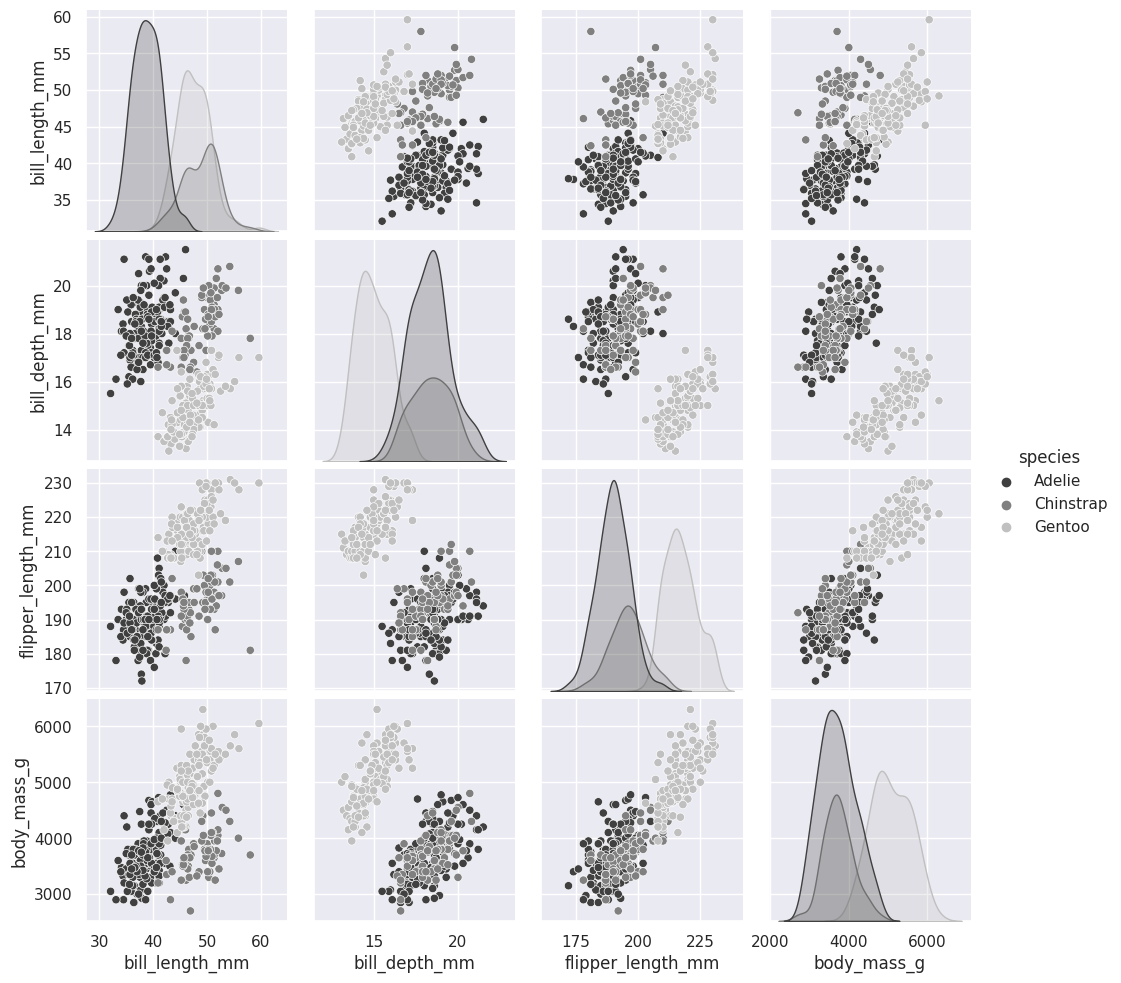

In [72]:
sns.pairplot(hue='species', data=penguins, palette='gray')

In [73]:
unittest.main(argv=[''], verbosity=2, exit=False)
doctest.testmod(verbose=True)

3 items had no tests:
    __main__
    __main__.__VSCODE_compute_hash
    __main__.__VSCODE_wrap_run_cell
0 tests in 3 items.
0 passed and 0 failed.
Test passed.



----------------------------------------------------------------------
Ran 0 tests in 0.000s

OK


TestResults(failed=0, attempted=0)